In [1]:
!pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%run "include/dados_incrementais_csv_original.ipynb"
%run "include/utils.ipynb"

**1. Definição do Problema de Negócios**

**Contexto do Problema:**

O contexto do problema é a construção de um modelo preditivo de regressão para prever os custos médicos individuais cobrados pelo seguro de saúde.
Isso envolve analisar um conjunto de dados que contém informações sobre características individuais, como idade, gênero, IMC (índice de massa corporal), número de filhos, fumante ou não, região, entre outros, e os custos médicos correspondentes.

**Objetivos da Análise:**

- Desenvolver um modelo preditivo de regressão que possa fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.
- Avaliar a importância das diferentes características no modelo de previsão de custos médicos.
- Identificar padrões e relacionamentos nos dados que possam ajudar a melhorar a precisão das previsões.
- Fornecer insights para ajudar a entender os principais fatores que influenciam os custos médicos individuais.

**Perguntas de Negócios:**

- Quais características individuais têm maior impacto nos custos médicos cobrados pelo seguro de saúde?
- Existe alguma correlação entre certas características (por exemplo, idade, IMC) e os custos médicos?
- O número de filhos influencia significativamente nos custos médicos?
- Há uma diferença significativa nos custos médicos entre fumantes e não fumantes?
- Qual é o impacto da região de residência no custo médico individual?
- Como o modelo pode ser utilizado para prever e planejar os custos médicos futuros?

**Benefícios Esperados:**

- Melhor compreensão dos fatores que contribuem para os custos médicos individuais.
- Desenvolvimento de um modelo preditivo preciso que possa ser usado para prever custos médicos futuros com base em diferentes características individuais.
- Melhoria na precificação do seguro de saúde, permitindo uma cobrança mais precisa e justa dos prêmios.
- Potencial economia de custos para seguradoras e segurados, evitando subestimação ou superestimação dos custos médicos.

**Descrição dos dados disponíveis**
    
Os dados disponíveis consistem em um conjunto de informações sobre segurados de um plano de saúde. Cada entrada no conjunto de dados contém as seguintes características:

- **Idade (int):** A idade do segurado.
- **Gênero (string):** O gênero do segurado (masculino ou feminino).
- **IMC (float):** O índice de massa corporal do segurado.
- **Número de Filhos (int):** O número de filhos do segurado.
- **Fumante (string):** Indicação se o segurado é fumante ou não.
- **Região (string):** A região geográfica onde o segurado reside.
- **Encargos (float):** Os custos médicos individuais cobrados pelo seguro de saúde.

Esses dados serão utilizados para desenvolver um modelo preditivo de regressão para prever os custos médicos individuais com base nas características fornecidas.

**2. Análise dos Dados**

**Sumário dos Dados:**

In [4]:
# leia os dados CSV indicados no site da FIAP
dados = pd.read_csv('../base_dados.csv', encoding='latin-1')

# aqui chamo a função incrementar_dados_aleatorios, para aumentar o volume da variável dados
dados = incrementar_dados_aleatorios_csv(dados)

# Aplicar a função para categorizar IMC e criar uma nova coluna 'Categoria IMC'
dados['Categoria IMC'] = dados['IMC'].apply(categorizar_imc)

print("\nAmostra dos dados:", dados.head())
print("\nQuantidade de linhas:", dados.shape[0])
print("\nQuantidade de colunas:", dados.shape[1])
print("\nTipos de dados das colunas:\n\n", dados.dtypes)
print("\nQuantidade de valores ausentes por coluna:\n\n", dados.isnull().sum())


Amostra dos dados:    Idade     Gênero        IMC  Filhos Fumante    Região      Encargos  \
0   56.0   feminino  29.774374     2.0     sim  sudoeste  31109.889763   
1   46.0  masculino  25.857395     1.0     não  nordeste  26650.702647   
2   32.0  masculino  23.014840     0.0     não  sudoeste  21459.037990   
3   34.0   feminino  29.276188     3.0     sim  noroeste  41139.962698   
4   63.0   feminino  27.077337     0.0     não   sudeste  40494.337398   

  Categoria IMC  
0     Sobrepeso  
1     Sobrepeso  
2   Peso Normal  
3     Sobrepeso  
4     Sobrepeso  

Quantidade de linhas: 203

Quantidade de colunas: 8

Tipos de dados das colunas:

 Idade            float64
Gênero            object
IMC              float64
Filhos           float64
Fumante           object
Região            object
Encargos         float64
Categoria IMC     object
dtype: object

Quantidade de valores ausentes por coluna:

 Idade            20
Gênero            0
IMC              20
Filhos           20
Fum

**Visualização dos Dados:** gráficos para entender a distribuição e padrões nos dados.

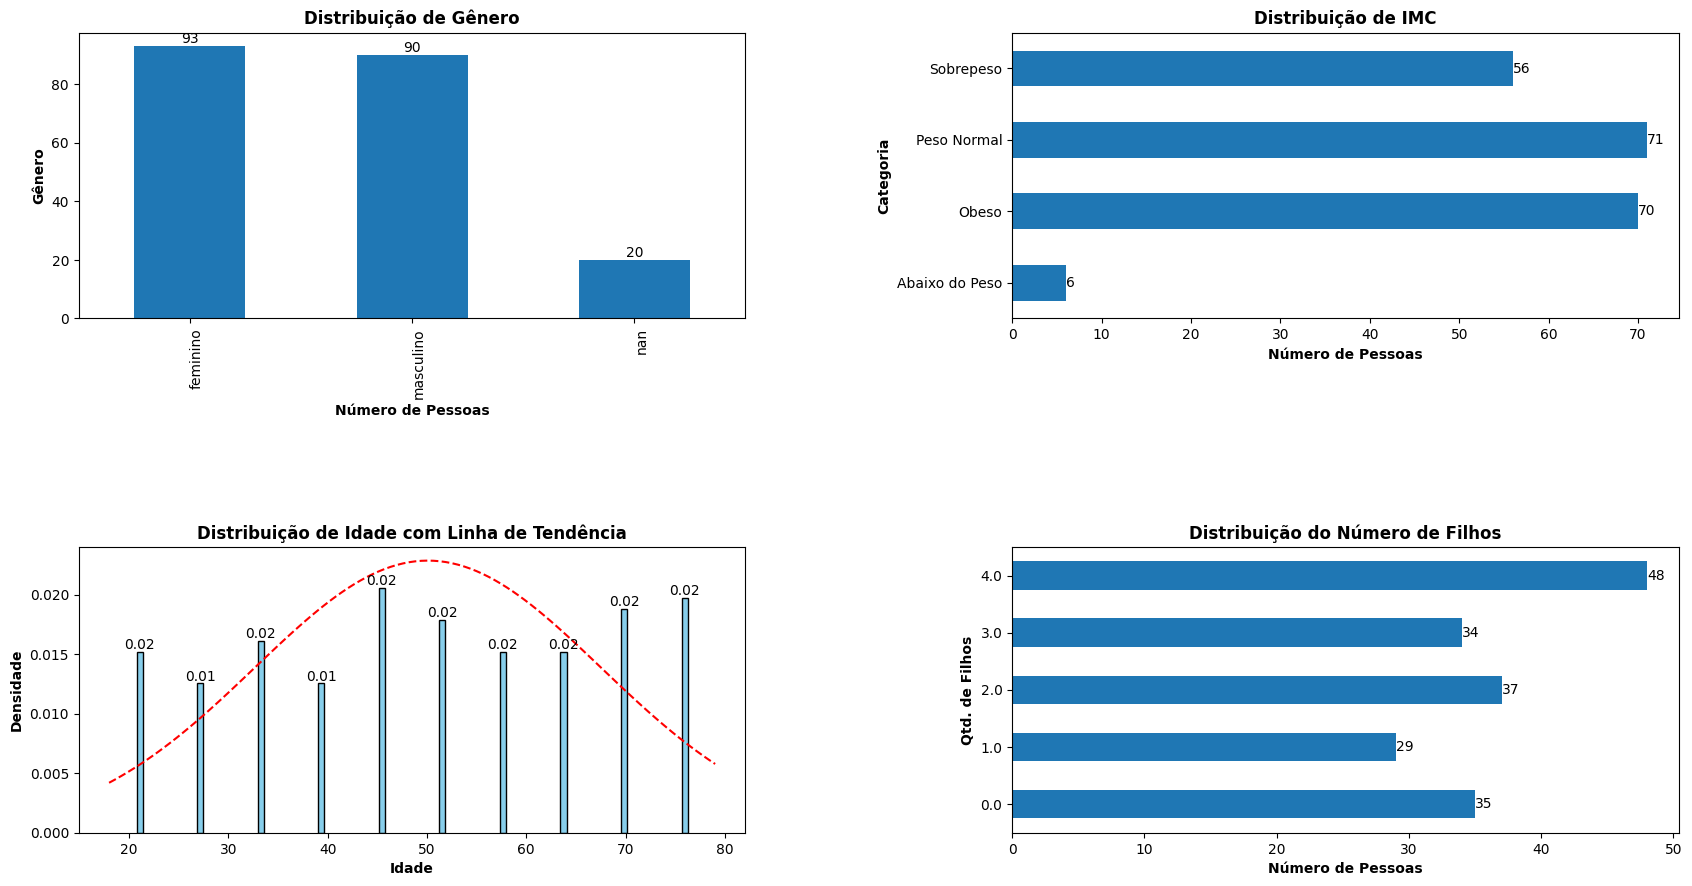

In [5]:
# Contar o número de ocorrências de algumas colunas
distribuicao_genero = dados['Gênero'].value_counts().sort_index()
distribuicao_imc = dados['Categoria IMC'].value_counts().sort_index()
distribuicao_filhos = dados['Filhos'].value_counts().sort_index()

# Criar uma figura e uma grade de subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Ajustar o espaçamento entre os subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.8)

montar_grafico_barra_vertical(distribuicao_genero, axs[0, 0], 'Distribuição de Gênero', 'Número de Pessoas', 'Gênero')

montar_grafico_barra_horizontal(distribuicao_imc, axs[0, 1], 'Distribuição de IMC', 'Número de Pessoas', 'Categoria')

montar_grafico_histograma_idade(dados, axs[1, 0], 'Distribuição de Idade com Linha de Tendência', 'Idade', 'Densidade')

montar_grafico_barra_horizontal(distribuicao_filhos, axs[1, 1], 'Distribuição do Número de Filhos', 'Número de Pessoas', 'Qtd. de Filhos')

# Mostra os gráficos
plt.show()

**3. Separação dos Dados em Treino e Teste**

**4. Análise Exploratória de Dados**

**Resumo Estatístico:**

In [6]:
print("\nInformações adicionais sobre os dados:\n\n", dados.describe())


Informações adicionais sobre os dados:

             Idade         IMC      Filhos      Encargos
count  183.000000  183.000000  183.000000    183.000000
mean    50.092896   26.324064    2.169399  29303.153137
std     17.446216    4.697180    1.463378  11949.638917
min     18.000000   18.025938    0.000000  10033.597220
25%     34.000000   22.793681    1.000000  19196.647847
50%     50.000000   25.878488    2.000000  28220.652870
75%     65.500000   30.408399    4.000000  39943.117520
max     79.000000   34.849999    4.000000  49952.910605


**Visualizações Gráficas:** Visualizações gráficas para entender a distribuição e relacionamentos entre as variáveis

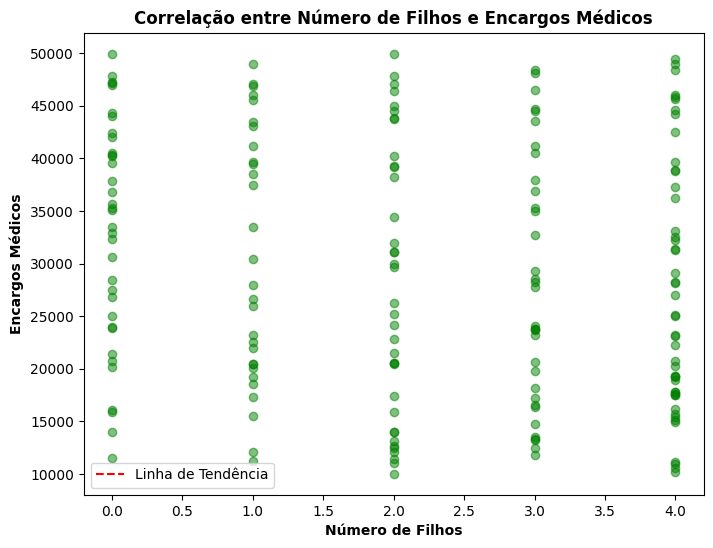

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

montar_grafico_correlacao(dados['Filhos'], dados['Encargos'], axs,
                          'Correlação entre Número de Filhos e Encargos Médicos', 'Número de Filhos', 'Encargos Médicos')

# Mostra os gráficos
plt.show()

# Calcula a correlação
#correlacao_filhos_encargos = dados['Filhos'].corr(dados['Encargos'])
#print("\nCorrelação entre Número de Filhos e Encargos Médicos:\n", correlacao_filhos_encargos)
#print('-' * 100)